Market K: Exploratory Data Analysis

In [1]:
#Task: Gerar insighs úteis para tomada de decisão do dataset market_k

In [2]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
market_k = pd.read_csv('/content/drive/My Drive/Portifólio Python Data Science/Market K/market_k_db.txt', sep=';', encoding='latin-1')

# fazendo slice para criar colunas mês e ano
market_k['dia'] = market_k['data'].apply(lambda data: data.split('/')[0])
market_k['mes'] = market_k['data'].apply(lambda data: data.split('/')[1])
market_k['ano'] = market_k['data'].apply(lambda data: data.split('/')[2])

#Criando trimestres
market_k['trimestre'] = market_k['mes'].apply(lambda x: (int(x)-1) // 3 +1) #dividindo o ano por 3 = 3 tri no ano, +1 pra iniciar do 1

#Criando semestre
market_k['semestre'] = market_k['mes'].apply(lambda x: (int(x)-1) // 6 +1) #dividindo o ano por 6 = 2 sem. no ano +1 pra iniciar do 1

#concatenando data x, formato padrão de AAAA-MM-DD
market_k.drop('data', inplace=True, axis=1)

market_k['data'] = market_k['ano']+'-'+market_k['mes']+'-'+market_k['dia']

market_k.head()

,id compra,cod vendedor,vendedor,cliente,nome cliente,cidade cliente,segmento,fornecedor,familia sku,categoria sku,id sku,apresentacao,sku,quantidade,preco und,total pedido,dia,mes,ano,trimestre,semestre,data
0,172891,16,VENDEDOR 16,2792,CLIENTE 1793,ARACAJU,COM.VAREJ.BRINQUEDOS,FORNECEDOR 101,FAMILIA 219,CATEGORIA 508,2923,1,SKU 811,1.0,340.00,340.00,02,01,2020,1,1,2020-01-02
1,172902,37,VENDEDOR 37,2577,CLIENTE 1578,ARACAJU,MINE MERCADINHO 1 CHEKOUT,FORNECEDOR 42,FAMILIA 44,CATEGORIA 385,1136,1,SKU 98,1.0,306.43,306.43,02,01,2020,1,1,2020-01-02
2,172925,36,VENDEDOR 36,2346,CLIENTE 1347,ARACAJU,SUPERMERCADO PEQUENO DE 05 A 09 CHECKOUTS,FORNECEDOR 96,FAMILIA 220,CATEGORIA 319,1528,1,SKU 883,1.0,200.05,200.05,02,01,2020,1,1,2020-01-02
3,172926,50,VENDEDOR 50,2668,CLIENTE 1669,NOSSA SENHORA DO SOCORRO,ESCOLAS/FACULDADES/UNIVERSIDADES,FORNECEDOR 49,FAMILIA 80,CATEGORIA 354,1158,1,SKU 1130,1.0,197.80,197.80,02,01,2020,1,1,2020-01-02
4,172916,16,VENDEDOR 16,1033,CLIENTE 34,ARACAJU,MERCADINHO DE 2 A 4 CHEKOUTS,FORNECEDOR 21,FAMILIA 257,CATEGORIA 138,1722,0,SKU 738,5.0,174.00,870.00,02,01,2020,1,1,2020-01-02


In [ ]:
market_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309750 entries, 0 to 309749
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   data            309750 non-null  object 
 1   id compra       309750 non-null  int64  
 2   cod vendedor    309750 non-null  int64  
 3   vendedor        309750 non-null  object 
 4   cliente         309750 non-null  int64  
 5   nome cliente    309750 non-null  object 
 6   cidade cliente  309750 non-null  object 
 7   segmento        309750 non-null  object 
 8   fornecedor      309750 non-null  object 
 9   familia sku     309750 non-null  object 
 10  categoria sku   309750 non-null  object 
 11  id sku          309750 non-null  int64  
 12  apresentacao    309750 non-null  int64  
 13  sku             309750 non-null  object 
 14  quantidade      309750 non-null  float64
 15  preco und       309750 non-null  float64
 16  total pedido    309750 non-null  float64
 17  dia       

In [ ]:
market_k.describe()

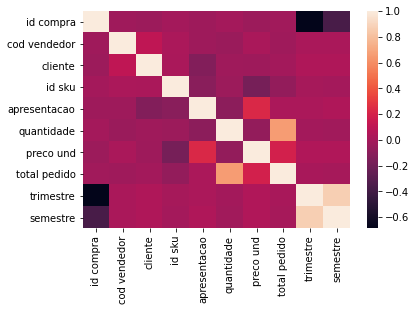

In [6]:
sns.heatmap(market_k.corr())

In [14]:
#transformando os dados categóricos em categóricos:

market_k['id compra'] = market_k['id compra'].astype('category')
market_k['cod vendedor'] = market_k['cod vendedor'].astype('category')
market_k['vendedor'] = market_k['vendedor'].astype('category')
market_k['cliente'] = market_k['cliente'].astype('category')
market_k['nome cliente'] = market_k['nome cliente'].astype('category')
market_k['cidade cliente'] = market_k['cidade cliente'].astype('category')
market_k['segmento'] = market_k['segmento'].astype('category')
market_k['fornecedor'] = market_k['fornecedor'].astype('category')
market_k['familia sku'] = market_k['familia sku'].astype('category')
market_k['categoria sku'] = market_k['categoria sku'].astype('category')
market_k['id sku'] = market_k['id sku'].astype('category')
market_k['apresentacao'] = market_k['apresentacao'].astype('category')
market_k['sku'] = market_k['sku'].astype('category')

#transformando 'data' para date
market_k['data'] = pd.to_datetime(market_k['data'])

#Transformando os numéricos em inteiro
market_k['dia'] = pd.to_numeric(market_k['dia'])
market_k['mes'] = pd.to_numeric(market_k['mes'])
market_k['ano'] = pd.to_numeric(market_k['ano'])

market_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309750 entries, 0 to 309749
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id compra       309750 non-null  category      
 1   cod vendedor    309750 non-null  category      
 2   vendedor        309750 non-null  category      
 3   cliente         309750 non-null  category      
 4   nome cliente    309750 non-null  category      
 5   cidade cliente  309750 non-null  category      
 6   segmento        309750 non-null  category      
 7   fornecedor      309750 non-null  category      
 8   familia sku     309750 non-null  category      
 9   categoria sku   309750 non-null  category      
 10  id sku          309750 non-null  category      
 11  apresentacao    309750 non-null  category      
 12  sku             309750 non-null  category      
 13  quantidade      309750 non-null  float64       
 14  preco und       309750 non-null  flo

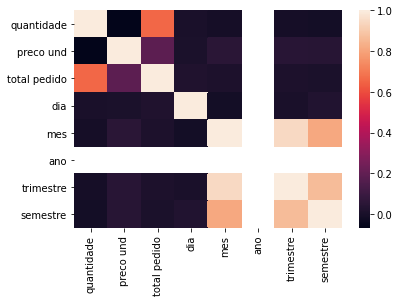

In [15]:
#Correlação sem dados categóricos
sns.heatmap(market_k.corr())

In [10]:
lineplot = px.line(market_k, x='data', y='total pedido', color='fornecedor')
lineplot.show()

Output hidden; open in https://colab.research.google.com to view.

In [32]:
scatterplot = px.scatter(x=market_k['data'], y=market_k['total pedido'], color=market_k['fornecedor'], labels={'x':'Ano', 'y':'Sellout'})
scatterplot.show()

Output hidden; open in https://colab.research.google.com to view.

In [24]:
pieplot = px.pie(market_k, values='total pedido', names='fornecedor', title='Total por Fornecedor')
pieplot.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
### 1. Análises descritivas criando os objetos abaixo:

In [ ]:
#pos1 = Total de clientes positivados no ano;
pos1 = market_k.groupby('ano').nunique('cliente').unstack()
pos1['cliente'].fillna(0)

ano
2020    2373
dtype: int64

In [ ]:
#pos2 = Total de clientes positivados por mês;
pos2 = market_k.groupby(by =['ano', 'mes']).nunique()['cliente'].unstack()
pos2.fillna(0)

mes,01,02,03,04,05,06,07,08,09,10
ano,,,,,,,,,,
2020,1724,1544,1535,1583,1608,1702,1804,1681,1666,133


In [ ]:
#pos3 = Total de clientes positivados por trimestre;
pos3 = market_k.groupby(by =['ano', 'trimestre']).nunique()['cliente'].unstack()
pos3.fillna(0)

trimestre,1,2,3,4
ano,,,,
2020,2063,2000,2095,133


In [ ]:
#pos4 = Total de clientes positivados por semestre;
pos4 = market_k.groupby(by =['ano', 'semestre']).nunique()['cliente'].unstack()
pos4.fillna(0)

semestre,1,2
ano,,
2020,2235,2101


In [ ]:
#pos5 = Total de clientes positivados por cidade;
pos5 = market_k.groupby(by =['cidade cliente', 'ano']).nunique()['cliente'].unstack()
pos5.fillna(0)

ano,2020
cidade cliente,
AQUIDABA,35
ARACAJU,696
ARAUA,8
AREIA BRANCA,11
BARRA DOS COQUEIROS,29
...,...
SIMAO DIAS,38
SIRIRI,6
TOBIAS BARRETO,68


In [ ]:
#pos6 = Total de clientes positivados por cidade no ano/mes
pos6 = market_k.groupby(by =['cidade cliente', 'ano', 'mes']).nunique()['cliente'].unstack()
pos6.fillna(0)

,mes,01,02,03,04,05,06,07,08,09,10
cidade cliente,ano,,,,,,,,,,
AQUIDABA,2020,26,16,22,20,20,27,23,23,24,0
ARACAJU,2020,500,459,438,441,456,462,505,481,472,24
ARAUA,2020,4,4,4,4,4,4,5,6,6,0
AREIA BRANCA,2020,9,8,10,9,7,10,8,8,6,0
BARRA DOS COQUEIROS,2020,14,15,15,17,17,17,19,19,21,3
...,...,...,...,...,...,...,...,...,...,...,...
SIMAO DIAS,2020,30,24,19,21,23,25,26,29,26,0
SIRIRI,2020,5,4,4,5,2,5,5,5,5,0
TOBIAS BARRETO,2020,49,45,42,52,53,54,56,47,51,0


In [ ]:
#pos7= Total de clientes positivados por cidade no trimestre;
pos7 = market_k.groupby(by =['cidade cliente', 'ano', 'trimestre']).nunique()['cliente'].unstack()
pos7.fillna(0)


,trimestre,1,2,3,4
cidade cliente,ano,,,,
AQUIDABA,2020,29,30,29,0
ARACAJU,2020,601,564,590,24
ARAUA,2020,5,5,7,0
AREIA BRANCA,2020,11,11,10,0
BARRA DOS COQUEIROS,2020,20,21,25,3
...,...,...,...,...,...
SIMAO DIAS,2020,33,29,31,0
SIRIRI,2020,5,5,5,0
TOBIAS BARRETO,2020,59,61,58,0


In [ ]:
#pos8 = Total de clientes positivados por cidade no semestre;
pos8 = market_k.groupby(by =['cidade cliente', 'ano', 'semestre']).nunique()['cliente'].unstack()
pos8.fillna(0)


,semestre,1,2
cidade cliente,ano,,
AQUIDABA,2020,35,29
ARACAJU,2020,651,594
ARAUA,2020,6,7
AREIA BRANCA,2020,11,10
BARRA DOS COQUEIROS,2020,24,25
...,...,...,...
SIMAO DIAS,2020,35,31
SIRIRI,2020,6,5
TOBIAS BARRETO,2020,66,58


In [ ]:
#pos9 = Total de clientes positivados por segmento de cliente no ano;
pos9 = market_k.groupby(by =['segmento', 'ano']).nunique()['cliente'].unstack()
pos9.fillna(0)


ano,2020
segmento,
ATACADISTA DE PRODUTOS AGRICOLAS,8
ATACADISTA/DIST.DOCES/BOMBONIERES,14
ATACAREJOS/CASH & CARRY,8
BARES,7
CALCADOS/MODA PRAIA/CONFECCOES/MAT.ESPORTIVO,3
CLINICAS HUMANAS,3
CLINICAS VETERINARIAS,32
CLINICAS VETERINARIAS ( P ),1
"COM DE CARNES,(ACOUGUES),PEIXES.AVES E OVOS",5


In [ ]:
#pos10 = Total de clientes positivados por segmento de cliente por mês;
pos10 = market_k.groupby(by =['segmento', 'ano', 'mes']).nunique()['cliente'].unstack()
pos10.fillna(0)

,mes,01,02,03,04,05,06,07,08,09,10
segmento,ano,,,,,,,,,,
ATACADISTA DE PRODUTOS AGRICOLAS,2020,5,2,5,5,5,5,6,6,6,0
ATACADISTA/DIST.DOCES/BOMBONIERES,2020,14,8,10,8,6,11,9,9,8,0
ATACAREJOS/CASH & CARRY,2020,7,7,7,7,7,8,7,8,6,2
BARES,2020,3,2,0,2,1,2,3,2,2,0
CALCADOS/MODA PRAIA/CONFECCOES/MAT.ESPORTIVO,2020,0,2,0,0,1,2,2,2,1,0
CLINICAS HUMANAS,2020,2,2,1,1,3,1,2,3,2,0
CLINICAS VETERINARIAS,2020,23,18,14,20,15,15,21,15,17,1
CLINICAS VETERINARIAS ( P ),2020,0,0,0,0,1,0,0,0,0,0
"COM DE CARNES,(ACOUGUES),PEIXES.AVES E OVOS",2020,2,4,3,3,3,3,4,4,4,0


In [ ]:
#pos11 = Total de clientes positivados por segmento de cliente por trimestre;
pos11 = market_k.groupby(by =['segmento', 'ano', 'trimestre']).nunique()['cliente'].unstack()
pos11.fillna(0)


,trimestre,1,2,3,4
segmento,ano,,,,
ATACADISTA DE PRODUTOS AGRICOLAS,2020,6,6,8,0
ATACADISTA/DIST.DOCES/BOMBONIERES,2020,14,12,11,0
ATACAREJOS/CASH & CARRY,2020,7,8,8,2
BARES,2020,4,3,3,0
CALCADOS/MODA PRAIA/CONFECCOES/MAT.ESPORTIVO,2020,2,2,3,0
CLINICAS HUMANAS,2020,3,3,3,0
CLINICAS VETERINARIAS,2020,28,25,24,1
CLINICAS VETERINARIAS ( P ),2020,0,1,0,0
"COM DE CARNES,(ACOUGUES),PEIXES.AVES E OVOS",2020,5,3,5,0


In [ ]:
#pos12 = Total de clientes positivados por segmento de cliente por semestre;
pos12 = market_k.groupby(by =['segmento', 'ano', 'semestre']).nunique()['cliente'].unstack()
pos12.fillna(0)

,semestre,1,2
segmento,ano,,
ATACADISTA DE PRODUTOS AGRICOLAS,2020,6,8
ATACADISTA/DIST.DOCES/BOMBONIERES,2020,14,11
ATACAREJOS/CASH & CARRY,2020,8,8
BARES,2020,6,3
CALCADOS/MODA PRAIA/CONFECCOES/MAT.ESPORTIVO,2020,3,3
CLINICAS HUMANAS,2020,3,3
CLINICAS VETERINARIAS,2020,31,24
CLINICAS VETERINARIAS ( P ),2020,1,0
"COM DE CARNES,(ACOUGUES),PEIXES.AVES E OVOS",2020,5,5


In [ ]:
#pos13 = Total de clientes positivados por família de produto no ano;
pos13 = market_k.groupby(by =['ano', 'semestre']).nunique()['familia sku'].unstack()
pos13.fillna(0)

semestre,1,2
ano,,
2020,259,147


In [ ]:
#pos14 = Total de clientes positivados por família de produto por mês
pos14 = market_k.groupby(by =['familia sku', 'ano', 'mes']).nunique()['cliente'].unstack()
pos14.fillna(0)

,mes,01,02,03,04,05,06,07,08,09,10
familia sku,ano,,,,,,,,,,
FAMILIA 1,2020,9,9,20,2,17,16,4,9,2,0
FAMILIA 10,2020,31,31,23,28,29,23,27,20,27,1
FAMILIA 100,2020,1,0,0,0,0,0,0,0,0,0
FAMILIA 101,2020,1,0,0,2,0,0,0,0,0,0
FAMILIA 102,2020,1,2,0,4,2,6,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
FAMILIA 95,2020,0,0,1,2,0,0,0,0,0,0
FAMILIA 96,2020,141,104,87,86,34,8,0,0,0,0
FAMILIA 97,2020,0,0,0,2,0,0,0,0,0,0


In [ ]:
#pos15 = Total de clientes positivados por família de produto por trimestre
pos15 = market_k.groupby(by =['familia sku', 'ano', 'trimestre']).nunique()['cliente'].unstack()
pos15.fillna(0)

,trimestre,1,2,3,4
familia sku,ano,,,,
FAMILIA 1,2020,32,30,12,0
FAMILIA 10,2020,56,52,50,1
FAMILIA 100,2020,1,0,0,0
FAMILIA 101,2020,1,2,0,0
FAMILIA 102,2020,3,12,3,0
...,...,...,...,...,...
FAMILIA 95,2020,1,2,0,0
FAMILIA 96,2020,245,116,0,0
FAMILIA 97,2020,0,2,0,0


In [ ]:
#pos16 = Total de clientes positivados por família de produto por semestre
pos16 = market_k.groupby(by =['familia sku', 'ano', 'semestre']).nunique()['cliente'].unstack()
pos16.fillna(0)

,semestre,1,2
familia sku,ano,,
FAMILIA 1,2020,51,12
FAMILIA 10,2020,72,51
FAMILIA 100,2020,1,0
FAMILIA 101,2020,3,0
FAMILIA 102,2020,14,3
...,...,...,...
FAMILIA 95,2020,3,0
FAMILIA 96,2020,287,0
FAMILIA 97,2020,2,0


In [ ]:
#pos17 = Total de clientes positivados por categoria de produto no ano;
pos17 = market_k.groupby(by =['familia sku', 'ano']).nunique()['categoria sku'].unstack()
pos17.fillna(0)


ano,2020
familia sku,
FAMILIA 1,1
FAMILIA 10,2
FAMILIA 100,1
FAMILIA 101,1
FAMILIA 102,1
...,...
FAMILIA 95,3
FAMILIA 96,2
FAMILIA 97,1


In [ ]:
#pos18 = Total de clientes positivados por categoria de produto por mês]
pos18 = market_k.groupby(by =['familia sku', 'ano', 'mes']).nunique()['categoria sku'].unstack()
pos18.fillna(0)

,mes,01,02,03,04,05,06,07,08,09,10
familia sku,ano,,,,,,,,,,
FAMILIA 1,2020,1,1,1,1,1,1,1,1,1,0
FAMILIA 10,2020,2,2,2,2,2,2,2,2,2,1
FAMILIA 100,2020,1,0,0,0,0,0,0,0,0,0
FAMILIA 101,2020,1,0,0,1,0,0,0,0,0,0
FAMILIA 102,2020,1,1,0,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
FAMILIA 95,2020,0,0,1,2,0,0,0,0,0,0
FAMILIA 96,2020,2,2,2,2,2,1,0,0,0,0
FAMILIA 97,2020,0,0,0,1,0,0,0,0,0,0


In [ ]:
#pos19= Total de clientes positivados por categoria de produto por trimestre
pos19 = market_k.groupby(by =['familia sku', 'ano', 'trimestre']).nunique()['categoria sku'].unstack()
pos19.fillna(0)

,trimestre,1,2,3,4
familia sku,ano,,,,
FAMILIA 1,2020,1,1,1,0
FAMILIA 10,2020,2,2,2,1
FAMILIA 100,2020,1,0,0,0
FAMILIA 101,2020,1,1,0,0
FAMILIA 102,2020,1,1,1,0
...,...,...,...,...,...
FAMILIA 95,2020,1,2,0,0
FAMILIA 96,2020,2,2,0,0
FAMILIA 97,2020,0,1,0,0


In [ ]:
#pos20 = Total de clientes positivados por categoria de produto por semestre
pos20 = market_k.groupby(by =['familia sku', 'ano', 'semestre']).nunique()['categoria sku'].unstack()
pos20.fillna(0)

,semestre,1,2
familia sku,ano,,
FAMILIA 1,2020,1,1
FAMILIA 10,2020,2,2
FAMILIA 100,2020,1,0
FAMILIA 101,2020,1,0
FAMILIA 102,2020,1,1
...,...,...,...
FAMILIA 95,2020,3,0
FAMILIA 96,2020,2,0
FAMILIA 97,2020,1,0


In [ ]:
#sellout1 = Sellout total por ano;
sell1 = market_k.groupby('ano').sum()['total pedido']
sell1.fillna(0)

ano
2020    5.387861e+07
Name: total pedido, dtype: float64

In [ ]:
#sellout2 = Sellout total por mês;
sell2 = market_k.groupby(by =['ano', 'mes']).sum()['total pedido'].unstack()
sell2.fillna(0)

mes,01,02,03,04,05,06,07,08,09,10
ano,,,,,,,,,,
2020,5255020.37,4869679.78,5341698.8,5445250.13,6128036.99,6533994.61,7886142.34,6277733.8,5914012.18,227039.01


In [ ]:
#sellout3 = Sellout total por trimestre;
sell3 = market_k.groupby(by =['ano', 'trimestre']).sum()['total pedido'].unstack()
sell3.fillna(0)

trimestre,1,2,3,4
ano,,,,
2020,1.546640e+07,1.810728e+07,2.007789e+07,227039.01


In [ ]:
#sellout4 = Sellout total por semestre
sell4 = market_k.groupby(by =['ano', 'semestre']).sum()['total pedido'].unstack()
sell4.fillna(0)

semestre,1,2
ano,,
2020,3.357368e+07,2.030493e+07


In [ ]:
#sellout5 = Sellout total por segmento no ano;
sell5 = market_k.groupby(by =['segmento', 'ano']).sum()['total pedido'].unstack()
sell5.fillna(0)

ano,2020
segmento,
ATACADISTA DE PRODUTOS AGRICOLAS,130204.53
ATACADISTA/DIST.DOCES/BOMBONIERES,217514.99
ATACAREJOS/CASH & CARRY,3878238.72
BARES,39201.99
CALCADOS/MODA PRAIA/CONFECCOES/MAT.ESPORTIVO,10318.36
CLINICAS HUMANAS,11138.44
CLINICAS VETERINARIAS,232406.65
CLINICAS VETERINARIAS ( P ),601.90
"COM DE CARNES,(ACOUGUES),PEIXES.AVES E OVOS",38588.26


In [ ]:
#sellout6 = Sellout total por segmento no mês;
sell6 = market_k.groupby(by =['segmento', 'ano', 'mes']).sum()['total pedido'].unstack()
sell6.fillna(0)

,mes,01,02,03,04,05,06,07,08,09,10
segmento,ano,,,,,,,,,,
ATACADISTA DE PRODUTOS AGRICOLAS,2020,19386.54,2436.26,8608.15,9808.51,12041.33,21691.69,35727.95,11521.42,8982.68,0.00
ATACADISTA/DIST.DOCES/BOMBONIERES,2020,37179.21,9370.28,24683.75,29413.53,18486.25,36351.99,15682.85,31614.10,14733.03,0.00
ATACAREJOS/CASH & CARRY,2020,221084.24,443673.32,539787.18,303064.36,533443.89,520547.08,625724.92,434501.44,252908.12,3504.17
BARES,2020,17634.43,675.60,0.00,1350.46,4846.00,952.59,5795.43,2571.68,5375.80,0.00
CALCADOS/MODA PRAIA/CONFECCOES/MAT.ESPORTIVO,2020,0.00,1291.01,0.00,0.00,951.47,1692.66,2483.58,1987.68,1911.96,0.00
CLINICAS HUMANAS,2020,2138.27,2235.71,1085.00,310.00,1018.52,616.00,1081.00,1077.94,1576.00,0.00
CLINICAS VETERINARIAS,2020,24563.13,26517.81,20525.07,20841.82,21394.11,29099.23,37800.02,23031.19,24064.27,4570.00
CLINICAS VETERINARIAS ( P ),2020,0.00,0.00,0.00,0.00,601.90,0.00,0.00,0.00,0.00,0.00
"COM DE CARNES,(ACOUGUES),PEIXES.AVES E OVOS",2020,2351.72,5506.36,1719.41,4106.67,4360.61,4629.79,5326.01,5549.61,5038.08,0.00


In [ ]:
#sellout7 = Sellout total por segmento no trimestre;
sell7 = market_k.groupby(by =['segmento', 'ano', 'trimestre']).sum()['total pedido'].unstack()
sell7.fillna(0)

,trimestre,1,2,3,4
segmento,ano,,,,
ATACADISTA DE PRODUTOS AGRICOLAS,2020,30430.95,43541.53,56232.05,0.00
ATACADISTA/DIST.DOCES/BOMBONIERES,2020,71233.24,84251.77,62029.98,0.00
ATACAREJOS/CASH & CARRY,2020,1204544.74,1357055.33,1313134.48,3504.17
BARES,2020,18310.03,7149.05,13742.91,0.00
CALCADOS/MODA PRAIA/CONFECCOES/MAT.ESPORTIVO,2020,1291.01,2644.13,6383.22,0.00
CLINICAS HUMANAS,2020,5458.98,1944.52,3734.94,0.00
CLINICAS VETERINARIAS,2020,71606.01,71335.16,84895.48,4570.00
CLINICAS VETERINARIAS ( P ),2020,0.00,601.90,0.00,0.00
"COM DE CARNES,(ACOUGUES),PEIXES.AVES E OVOS",2020,9577.49,13097.07,15913.70,0.00


In [ ]:
#sellout8 = Sellout total por segmento no semestre;
sell8 = market_k.groupby(by =['segmento', 'ano', 'semestre']).sum()['total pedido'].unstack()
sell8.fillna(0)

,semestre,1,2
segmento,ano,,
ATACADISTA DE PRODUTOS AGRICOLAS,2020,73972.48,56232.05
ATACADISTA/DIST.DOCES/BOMBONIERES,2020,155485.01,62029.98
ATACAREJOS/CASH & CARRY,2020,2561600.07,1316638.65
BARES,2020,25459.08,13742.91
CALCADOS/MODA PRAIA/CONFECCOES/MAT.ESPORTIVO,2020,3935.14,6383.22
CLINICAS HUMANAS,2020,7403.50,3734.94
CLINICAS VETERINARIAS,2020,142941.17,89465.48
CLINICAS VETERINARIAS ( P ),2020,601.90,0.00
"COM DE CARNES,(ACOUGUES),PEIXES.AVES E OVOS",2020,22674.56,15913.70


In [ ]:
#sellout9 = Sellout total por cidade no ano;
sell9 = market_k.groupby(by =['cidade cliente', 'ano']).sum()['total pedido'].unstack()
sell9.fillna(0)

ano,2020
cidade cliente,
AQUIDABA,389337.20
ARACAJU,19575964.05
ARAUA,68333.71
AREIA BRANCA,83140.76
BARRA DOS COQUEIROS,675888.20
...,...
SIMAO DIAS,880517.21
SIRIRI,61783.92
TOBIAS BARRETO,1656452.93
